In [48]:
%autosave 0
%matplotlib inline

Autosave disabled


In [49]:
import sys
import os

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [50]:
TEST_INPUT_IMAGE = "/home/app/data/input/images/JPEG_Convert_Resolution_1024/slwa_b1921405_1_master.jpg"
TEST_OUTPUT_IMAGE = "/home/app/data/output/images/text/slwa_b1921405_1_master.jpg"
TRAINED_CLASSIFIER_DIR = "/home/app/thickshake/image/deps"

In [38]:
img      = cv.imread(TEST_INPUT_IMAGE)
vis      = img.copy()

In [39]:
# Extract channels to be processed individually
channels = cv.text.computeNMChannels(img)
# Append negative channels to detect ER- (bright regions over dark background)
cn = len(channels)-1
for c in range(0,cn):
    channels.append((255-channels[c]))

In [40]:
# Apply the default cascade classifier to each independent channel (could be done in parallel)
print("Extracting Class Specific Extremal Regions from "+str(len(channels))+" channels ...")
print("    (...) this may take a while (...)")

rects_array = []

for channel in channels:

    erc1 = cv.text.loadClassifierNM1(TRAINED_CLASSIFIER_DIR+'/trained_classifierNM1.xml')
    er1 = cv.text.createERFilterNM1(erc1,4,0.00015,0.15,0.2,True,0.1)

    erc2 = cv.text.loadClassifierNM2(TRAINED_CLASSIFIER_DIR+'/trained_classifierNM2.xml')
    er2 = cv.text.createERFilterNM2(erc2,0.5)

    regions = cv.text.detectRegions(channel,er1,er2)

    #rects = cv.text.erGrouping(img,channel,[r.tolist() for r in regions])
    rects = cv.text.erGrouping(img,channel,[x.tolist() for x in regions],
        cv.text.ERGROUPING_ORIENTATION_ANY,TRAINED_CLASSIFIER_DIR+"/trained_classifier_erGrouping.xml",0.5)

    rects_array.extend(rects)

    #Visualization
    for r in range(0,np.shape(rects)[0]):
        rect = rects[r]
        cv.rectangle(vis, (rect[0],rect[1]), (rect[0]+rect[2],rect[1]+rect[3]), (255, 0, 0), 2)


Extracting Class Specific Extremal Regions from 9 channels ...
    (...) this may take a while (...)


In [41]:
rects_array

[array([321, 626, 147,  45], dtype=int32),
 array([221, 146, 370,  38], dtype=int32),
 array([321, 626, 147,  45], dtype=int32),
 array([221, 146, 370,  38], dtype=int32),
 array([321, 626, 147,  45], dtype=int32),
 array([221, 146, 370,  38], dtype=int32),
 array([321, 626, 147,  45], dtype=int32),
 array([221, 146, 370,  38], dtype=int32),
 array([237, 250,  24,  19], dtype=int32),
 array([457, 701,  39,  58], dtype=int32),
 array([237, 250,  24,  19], dtype=int32),
 array([457, 701,  39,  58], dtype=int32),
 array([237, 250,  24,  19], dtype=int32),
 array([457, 701,  39,  58], dtype=int32),
 array([237, 250,  24,  19], dtype=int32),
 array([457, 701,  39,  58], dtype=int32)]

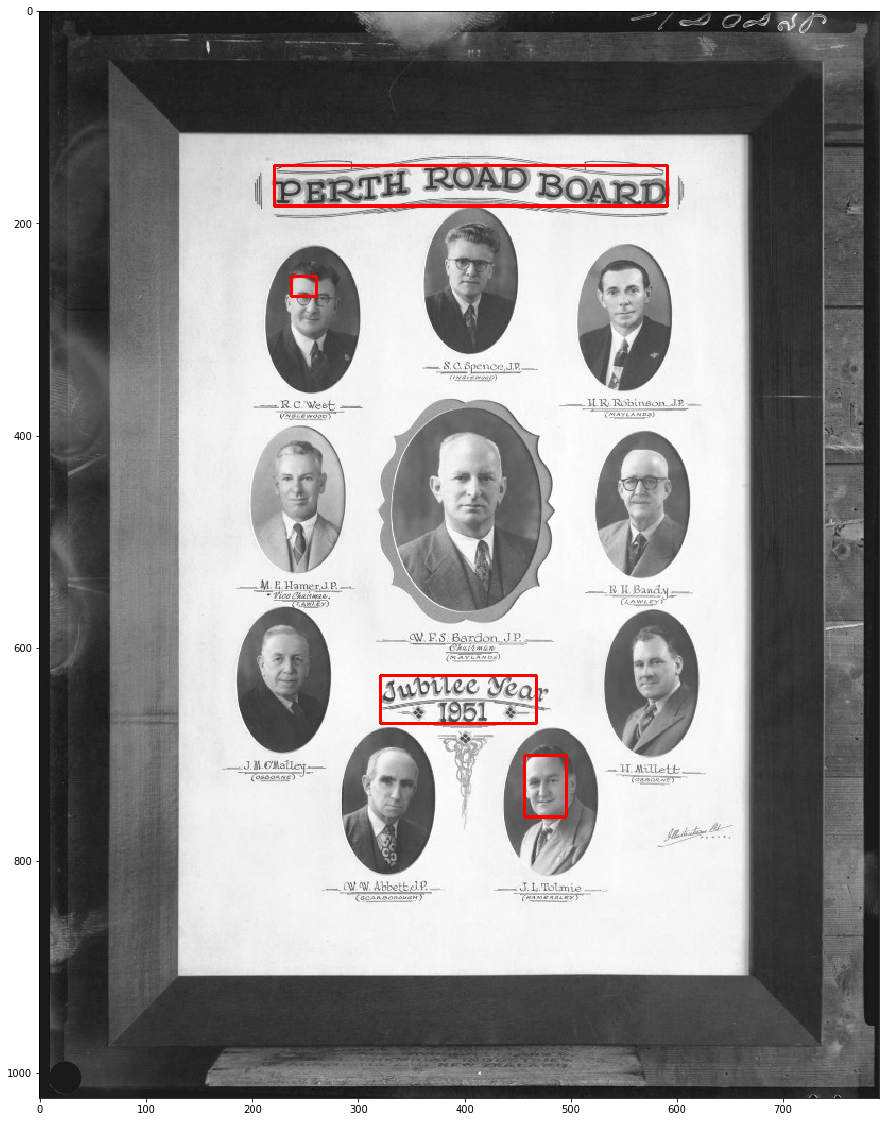

In [32]:
#Visualization
fig = plt.figure(figsize=(20,20))
plt.imshow(vis)
plt.show()
fig.savefig(TEST_OUTPUT_IMAGE, bbox_inches='tight')

In [4]:
import pyocr
tools = pyocr.get_available_tools()
tool = tools[0]

In [90]:
import matplotlib.cm


In [79]:
from PIL import ImageFilter

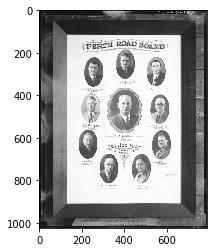

In [96]:
rect = rects_array[0]
im =Image.open(TEST_INPUT_IMAGE)
plt.imshow(np.asarray(im),cmap=matplotlib.cm.Greys_r)

In [132]:
DICTIONARY_PATH = "/home/app/thickshake/parser/deps/dictionary.txt"
with open(DICTIONARY_PATH) as word_file:
    dictionary = set()
    dictionary.update([word.strip().lower() for word in word_file])
    dictionary.update(["Perth", "Western", "Australia"])

In [139]:
def calc_accuracy(text):
    text= text.strip().lower()
    length = len(text.replace(" ", ""))
    if length == 0:return 0
    valid_characters = 0
    for word in text.split(" "):
        if word in dictionary:
            valid_characters += len(word)
    score = valid_characters / float(length)
    return score

In [140]:
("PERTH ROAD")

'PERTH ROAD'

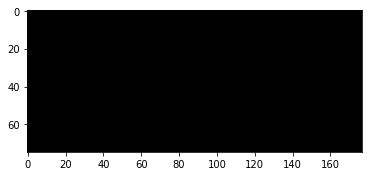

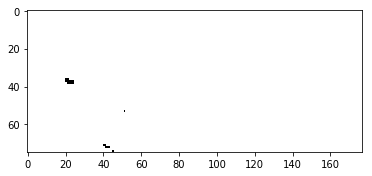

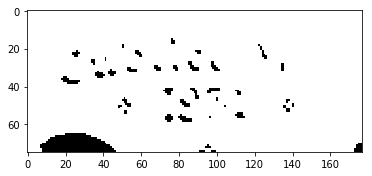

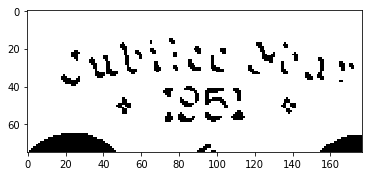

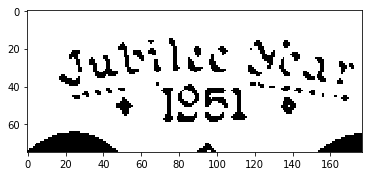

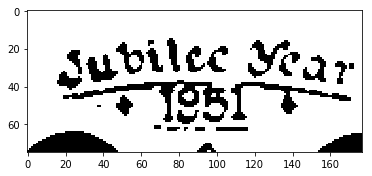

{'txt': 'ng\'lltc ya“; 7.\n‘ v\nA \' "A A', 't': 175}


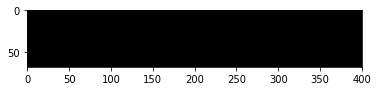

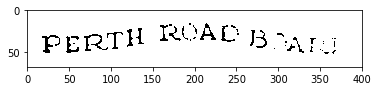

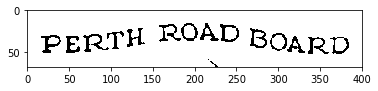

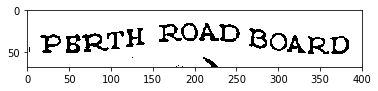

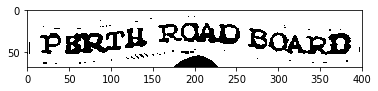

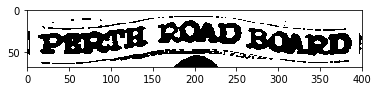

{'txt': 'PERTH ROAD BOARD', 't': 100}


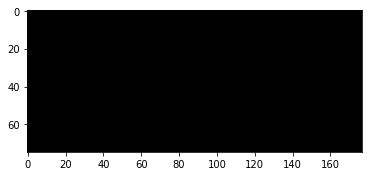

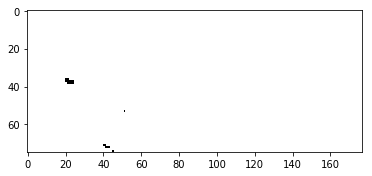

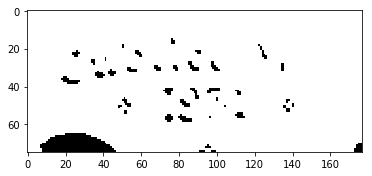

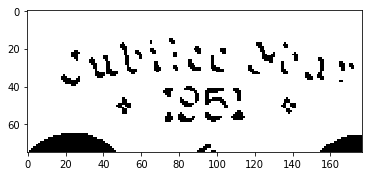

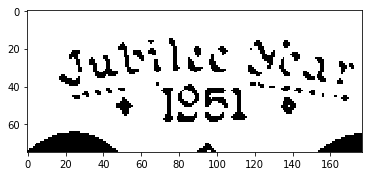

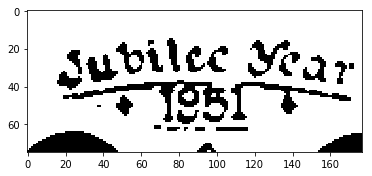

{'txt': 'ng\'lltc ya“; 7.\n‘ v\nA \' "A A', 't': 175}


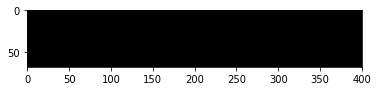

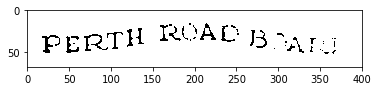

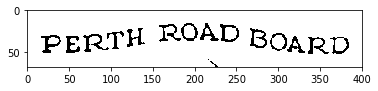

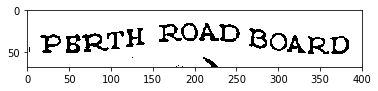

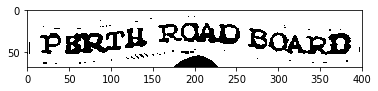

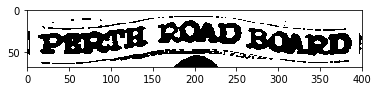

{'txt': 'PERTH ROAD BOARD', 't': 100}


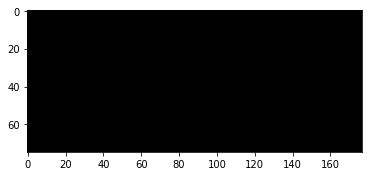

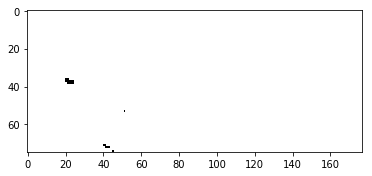

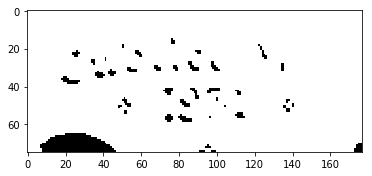

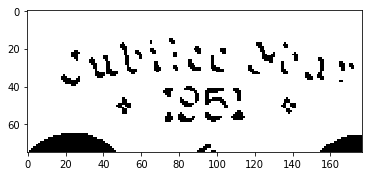

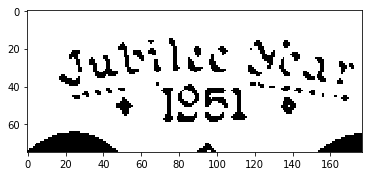

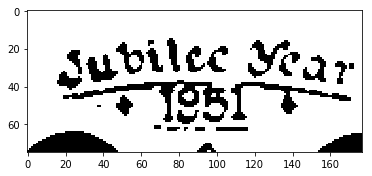

{'txt': 'ng\'lltc ya“; 7.\n‘ v\nA \' "A A', 't': 175}


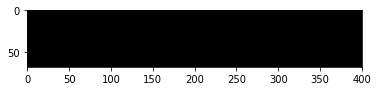

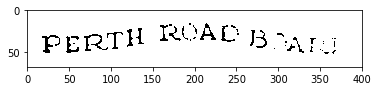

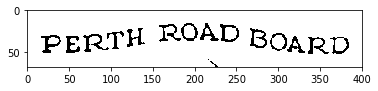

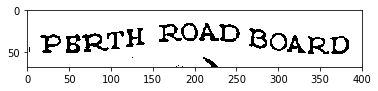

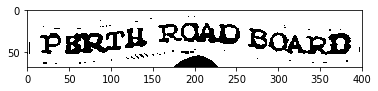

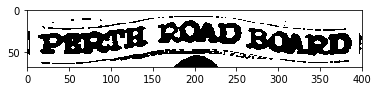

{'txt': 'PERTH ROAD BOARD', 't': 100}


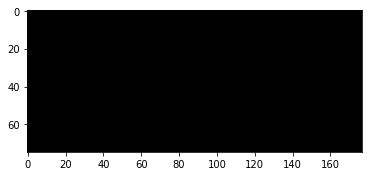

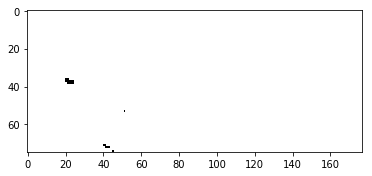

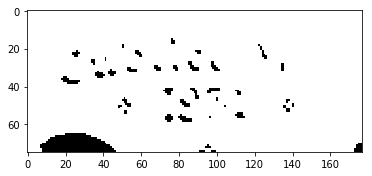

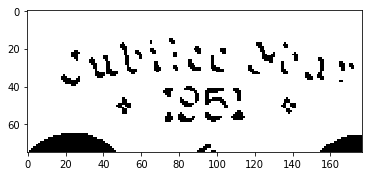

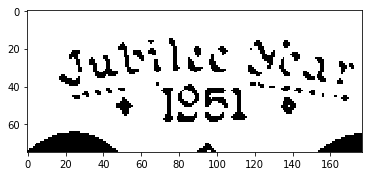

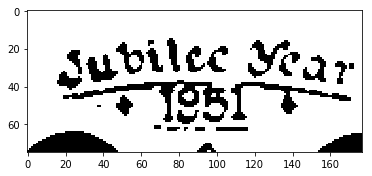

{'txt': 'ng\'lltc ya“; 7.\n‘ v\nA \' "A A', 't': 175}


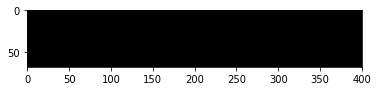

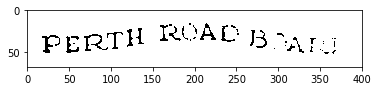

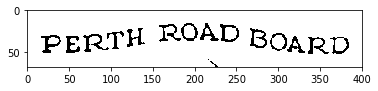

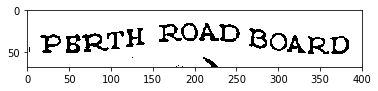

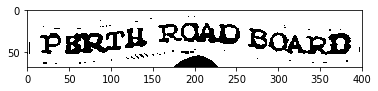

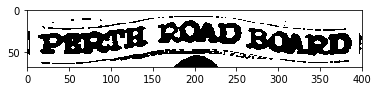

{'txt': 'PERTH ROAD BOARD', 't': 100}


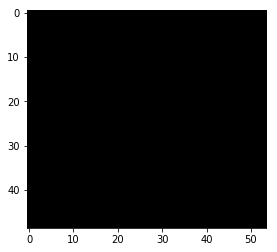

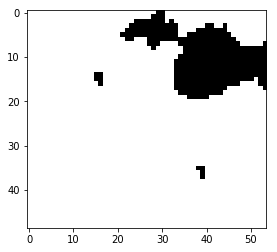

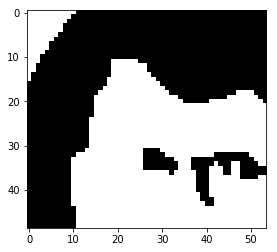

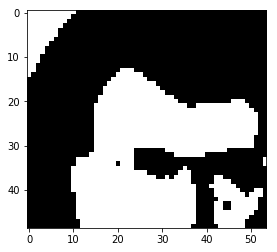

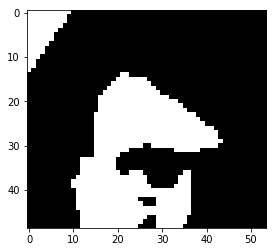

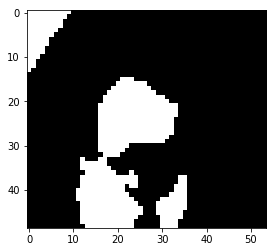

{}


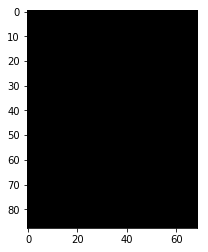

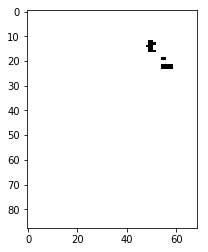

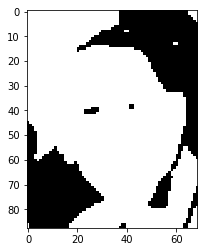

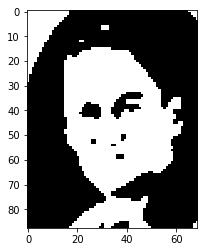

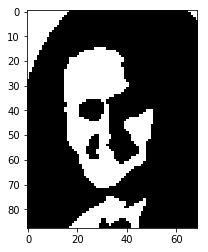

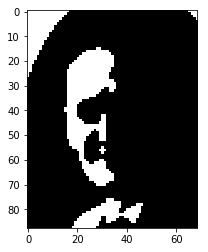

{}


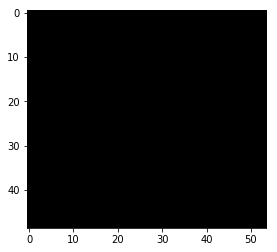

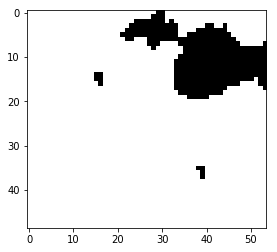

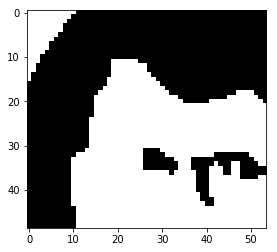

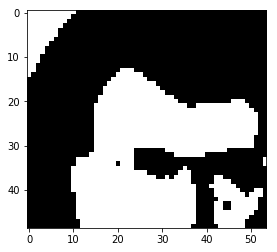

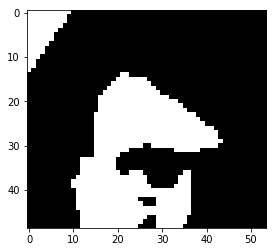

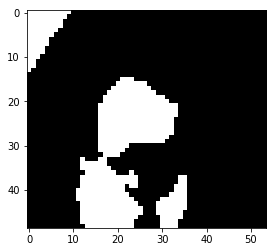

{}


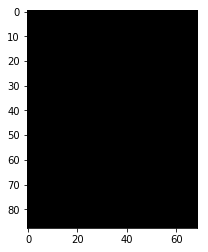

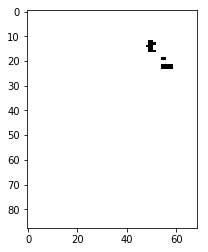

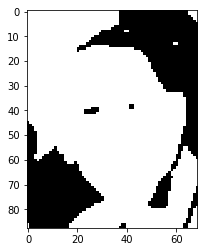

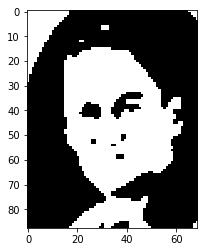

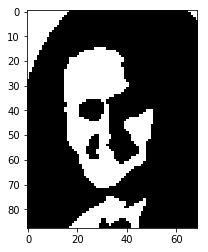

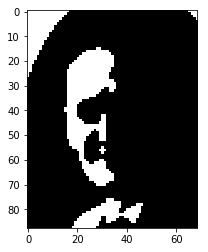

{}


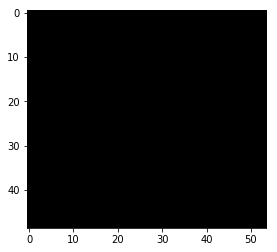

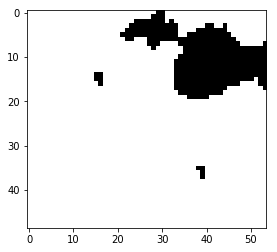

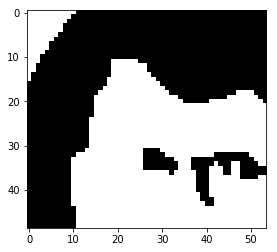

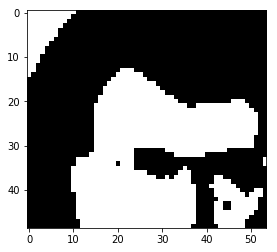

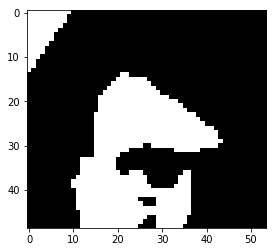

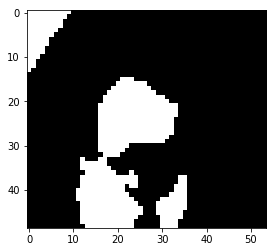

{}


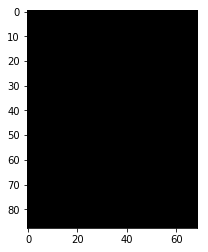

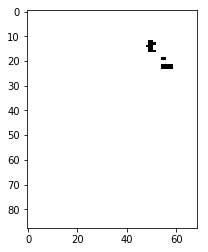

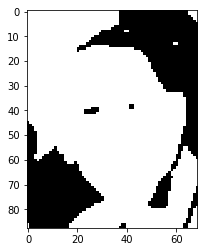

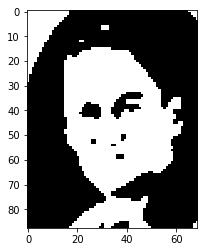

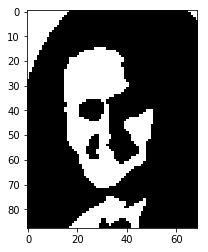

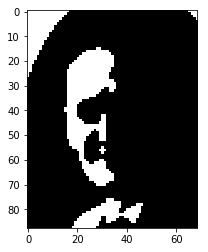

{}


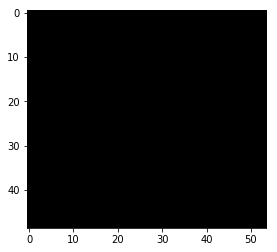

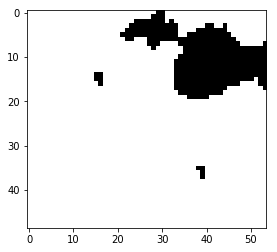

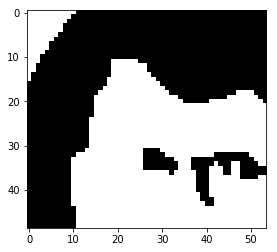

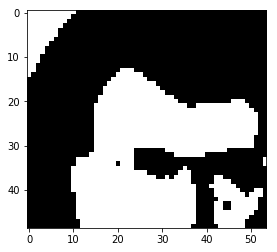

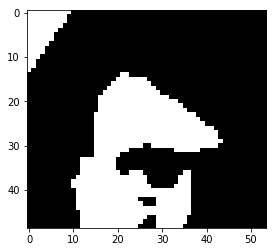

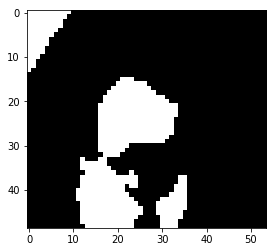

{}


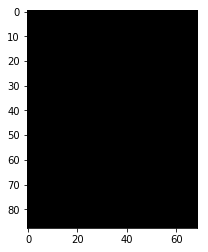

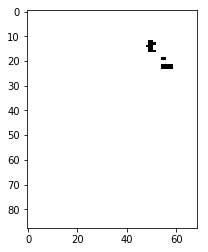

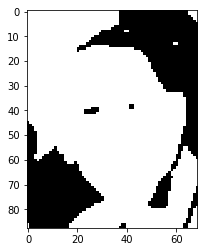

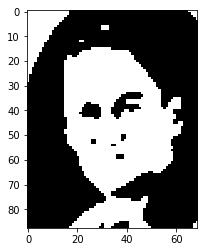

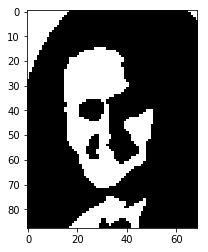

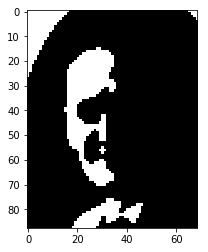

{}


In [141]:
for rect in rects_array:
    crop_img = im.crop((rect[0] - 15, rect[1] - 15, rect[0] + rect[2] + 15, rect[1] + rect[3] + 15))
    crop_img = crop_img.convert('L')                             # grayscale
    crop_img = crop_img.filter(ImageFilter.MedianFilter())       # a little blur
    best_score_t = 0
    best = dict()
    for t in range(50, 200, 25):
        crop_img_t = crop_img.point(lambda x: 0 if x < t else 255) # threshold (binarize)
        plt.imshow(np.asarray(crop_img_t),cmap=matplotlib.cm.Greys_r)
        plt.show()
        txt = tool.image_to_string(crop_img_t)
        score_t = calc_accuracy(txt)
        if score_t > best_score_t:
            best = dict(t=t, txt=txt)
            best_score_t = score_t
    print(best)

In [46]:
img.crop((rect[0], rect[1], rect[0] + rect[2], rect[1] + rect[3]))
plt.imshow(img)
plt.show()
txt = tool.image_to_string(img)
print(txt)

AttributeError: 'numpy.ndarray' object has no attribute 'mask'